# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

bash: line 1: gdown: command not found


CalledProcessError: Command 'b'gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3\n'' returned non-zero exit status 127.

Начнем с необходимых приготовлений.

In [2]:

import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

% matplotlib inline

ModuleNotFoundError: No module named 'ipywidgets'

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [3]:
coins = pd.read_csv('coins.csv', index_col='date')
coins.head()

NameError: name 'pd' is not defined

Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [4]:
coins['name'].nunique()

NameError: name 'coins' is not defined

### 2. За какой период данные мы имеем? (0.4 балла)

In [5]:
coins.index.min(), coins.index.max()

NameError: name 'coins' is not defined

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [6]:
coins.isna().sum()

NameError: name 'coins' is not defined

Больше всего пропусков в колонках связанных с транзакциями. Это может быть связано с тем, что не все монеты поддерживают транзакции.

In [7]:
coins[coins.isna().any(axis=1)]['name'].unique()

NameError: name 'coins' is not defined

Выведем монеты для которых есть пропуски. Видим, что это действительно монеты, которые либо не поддерживают транзакции, либо транзакции просто не учтены в датасете.

In [8]:
coins[coins['name'] == 'Lisk']

NameError: name 'coins' is not defined

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [9]:
coins[coins['high'] == coins['high'].max()]

NameError: name 'coins' is not defined

Видим, что самая высокая цена была у биткоина в 17.12.2017

### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

In [10]:
coins.groupby('name')['market'].mean().sort_values(ascending=False)

NameError: name 'coins' is not defined

In [11]:
#объединить все монеты с капитализацией меньше чем у binance coin в одну группу Others
pl_coins = coins.groupby('name')['market'].mean().sort_values(ascending=False)
pl_coins['Others'] = pl_coins[pl_coins < pl_coins['Binance Coin']].sum()
pl_coins = pl_coins[pl_coins >= pl_coins['Binance Coin']]

NameError: name 'coins' is not defined

In [12]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''


fig = plt.figure(figsize=(15, 15))
plt.pie(pl_coins, labels=pl_coins.index, autopct=my_autopct)
plt.show()

NameError: name 'plt' is not defined

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [13]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coin = coins[coins['symbol'] == symbol]
    coin.index = pd.to_datetime(coin.index)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    coin = coin[(coin.index >= start_date) & (coin.index <= end_date)]

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    ax.set_title(f'Price action for VERI')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid()

    ax.plot(coin.index, coin['open'], label='open', alpha=0.7)
    ax.plot(coin.index, coin['close'], label='close', alpha=0.7)
    ax.plot(coin.index, coin['high'], label='high', alpha=0.7)
    ax.plot(coin.index, coin['low'], label='low', alpha=0.7)
    ax.set_ylim(0, coin['high'].max() * 1.1)

    ax.legend()
    plt.show()

Посмотрим, что получилось:

In [14]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

NameError: name 'coins' is not defined

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [107]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coin = coins[coins['symbol'] == symbol]
    coin.index = pd.to_datetime(coin.index)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    coin = coin[(coin.index >= start_date) & (coin.index <= end_date)]

    coin['pnd'] = coin['high'] / coin[['open', 'close']].max(axis=1)
    max_pnd = coin['pnd'].max()
    max_pnd_date = coin[coin['pnd'] == max_pnd].index[0]
    return (max_pnd_date, max_pnd)

In [108]:
max_pnd_date, max_pnd = find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')
print(f'Max pnd for BTC was on {max_pnd_date} and was equal to {max_pnd}')

Max pnd for BTC was on 2017-11-29 00:00:00 and was equal to 1.1428940004366206


Сравните эти значения для разных монет:

In [159]:
pnd = pd.DataFrame(columns=['symbol', 'max_pnd_date', 'max_pnd'])
for symbol in coins['symbol'].unique():
    max_pnd_date, max_pnd = find_most_severe_pump_and_dump(coins, symbol=symbol, start_date='2013-06-01', end_date='2018-06-01')
    #add to dataframe with concat
    pnd = pnd.append({'symbol': symbol, 'max_pnd_date': max_pnd_date, 'max_pnd': max_pnd}, ignore_index=True)

pnd = pnd.sort_values(by='max_pnd', ascending=False)
pnd

,symbol,max_pnd_date,max_pnd
26,VERI,2017-06-11,33.549254
4,DGB,2014-02-27,32.119149
27,FUN,2017-06-29,12.490562
46,TRX,2017-09-16,9.651010
34,BTM,2018-03-13,7.177933
...,...,...,...
63,CENNZ,2018-04-07,1.177753
38,BNB,2017-12-26,1.176080
42,NAS,2017-11-17,1.175824
9,USDT,2017-05-27,1.152381


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [115]:
def compute_roi(coins, investments, start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    coins.index = pd.to_datetime(coins.index)
    coins = coins[(coins.index >= start_date) & (coins.index <= end_date)]

    portfolio = pd.DataFrame(columns=['date', 'portfolio_value'])
    for date in coins.index.unique():
        portfolio_value = 0
        for symbol, amount in investments.items():
            coin = coins[(coins['symbol'] == symbol) & (coins.index == date)]
            if len(coin) == 0:
                continue
            portfolio_value += amount * coin['close'].values[0]
        portfolio = portfolio.append({'date': date, 'portfolio_value': portfolio_value}, ignore_index=True)

    portfolio['portfolio_value_change'] = portfolio['portfolio_value'].pct_change()
    portfolio['portfolio_value_change'].fillna(0, inplace=True)
    portfolio['portfolio_value_change'].replace([np.inf, -np.inf], 0, inplace=True)
    portfolio['portfolio_value_change'] += 1
    portfolio['portfolio_value_change'] = portfolio['portfolio_value_change'].cumprod()
    portfolio['portfolio_value_change'] -= 1

    print(f'Portfolio value change: {portfolio["portfolio_value_change"].values[-1]}')
    return portfolio

In [116]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

Portfolio value change: 0.09957478940177644


,date,portfolio_value,portfolio_value_change
0,2018-04-04,6913045.0,0.000000
1,2018-04-05,6871035.0,-0.006077
2,2018-04-06,6692900.0,-0.031845
3,2018-04-07,6969220.0,0.008126
4,2018-04-08,7082355.0,0.024491
5,2018-04-09,6828225.0,-0.012270
6,2018-04-10,6891890.0,-0.003060
7,2018-04-11,7027465.0,0.016551
8,2018-04-12,7953920.0,0.150567
9,2018-04-13,7958635.0,0.151249


In [117]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

Portfolio value change: 58.09510130606281


,date,portfolio_value,portfolio_value_change
0,2013-05-28,130545.0,0.000000
1,2013-05-29,133850.0,0.025317
2,2013-05-30,130285.0,-0.001992
3,2013-05-31,130480.0,-0.000498
4,2013-06-01,130715.0,0.001302
...,...,...,...
1831,2018-06-02,7705105.0,58.022598
1832,2018-06-03,7783000.0,58.619288
1833,2018-06-04,7574420.0,57.021525
1834,2018-06-05,7694610.0,57.942204


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [118]:
def plot_bollinger_bands(coins, symbol, window, width):
    coin = coins[coins['symbol'] == symbol]
    coin['MA'] = coin['close'].rolling(window=window).mean()
    coin['std'] = coin['close'].rolling(window=window).std()
    coin['upper'] = coin['MA'] + width * coin['std']
    coin['lower'] = coin['MA'] - width * coin['std']

    plt.figure(figsize=(15, 7))
    plt.plot(coin.index, coin['close'], label='close')
    plt.plot(coin.index, coin['MA'], label='MA')
    plt.plot(coin.index, coin['upper'], label='upper')
    plt.plot(coin.index, coin['lower'], label='lower')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{symbol} Bollinger Bands')
    plt.show()

/var/folders/_q/h4h3ghz564s22rz24b7hmy440000gn/T/ipykernel_13621/4010865533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin['MA'] = coin['close'].rolling(window=window).mean()
/var/folders/_q/h4h3ghz564s22rz24b7hmy440000gn/T/ipykernel_13621/4010865533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin['std'] = coin['close'].rolling(window=window).std()
/var/folders/_q/h4h3ghz564s22rz24b7hmy440000gn/T/ipykernel_13621/4010865533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

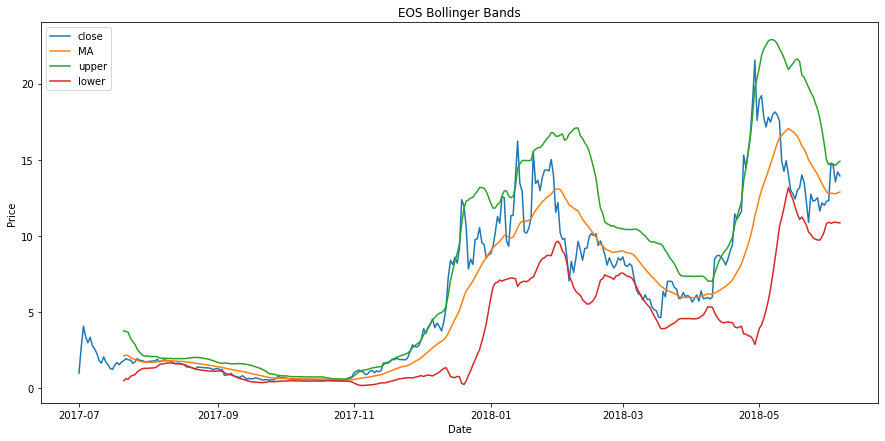

In [119]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут**
Как видно из графика гипотеза Боллинджера выполняется, т.к. цена касается границы от нее отражается и 95% значений лежит внутри границ.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [133]:
def plot_coins_capitalizations(coins, symbols, start_date):
    coins.index = pd.to_datetime(coins.index)
    coins = coins[coins.index >= start_date]
    coins = coins[coins['symbol'].isin(symbols)]
    coins = coins.pivot(columns='symbol', values='market')
    coins.plot(figsize=(15, 7))
    plt.xlabel('Date')
    plt.ylabel('Market Cap')
    plt.title('Coins capitalizations')
    plt.show()

    coins = coins.div(coins.sum(axis=1), axis=0)
    coins.plot(figsize=(15, 7))
    plt.xlabel('Date')
    plt.ylabel('Market share')
    plt.title('Сapitalization share')
    plt.show()

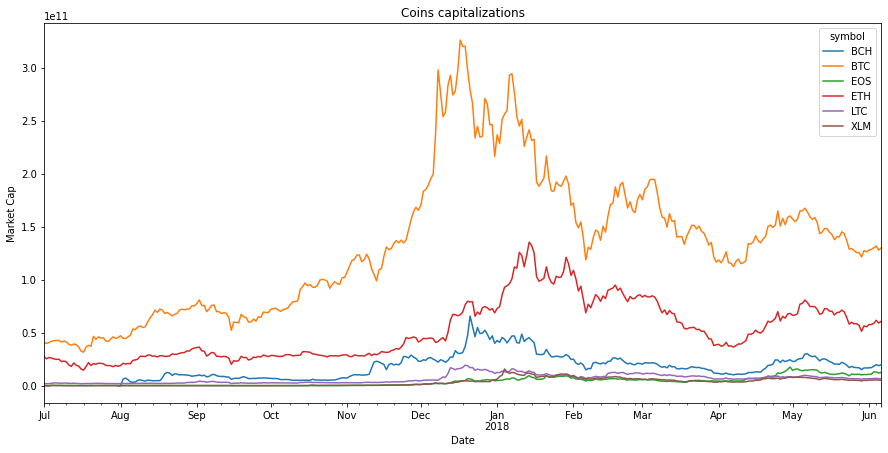

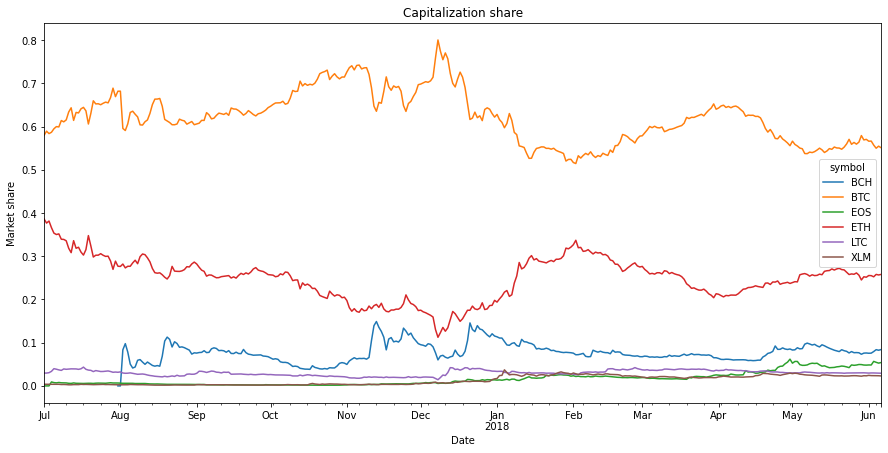

In [134]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**
Видно, что доля капитализации альткойнов растет, когда доля капитализации биткойна падает. Это связано с тем, что альткойны торгуются в парах с биткойном, поэтому когда биткойн падает, то альткойны падают еще сильнее, т.к. их цена в биткойнах падает. Поэтому доля капитализации альткойнов растет, когда доля капитализации биткойна падает.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [136]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    coins.index = pd.to_datetime(coins.index)
    date = pd.to_datetime(date)
    coins = coins[coins['symbol'].isin(symbols)]
    coins = coins.pivot(columns='symbol', values='market')
    coins = coins[coins.index <= date]
    coins = coins.rolling(window=window).mean()
    coins = coins.dropna()
    coins = coins.div(coins.sum(axis=1), axis=0)
    coins = coins.ewm(alpha=alpha).mean()
    return coins.corr()

In [137]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/_q/h4h3ghz564s22rz24b7hmy440000gn/T/ipykernel_13621/971260993.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.35,-0.89,0.54,0.62,0.63,0.87
BCH,0.35,1.00,-0.15,0.10,-0.33,-0.01,0.11
BTC,-0.89,-0.15,1.00,-0.74,-0.83,-0.65,-0.97
EOS,0.54,0.10,-0.74,1.00,0.48,0.54,0.82
ETH,0.62,-0.33,-0.83,0.48,1.00,0.43,0.75
LTC,0.63,-0.01,-0.65,0.54,0.43,1.00,0.75
XLM,0.87,0.11,-0.97,0.82,0.75,0.75,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [138]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/_q/h4h3ghz564s22rz24b7hmy440000gn/T/ipykernel_13621/950888474.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.37,0.02,0.85,-0.60,0.67,0.97
BCH,0.37,1.00,-0.26,0.79,-0.88,-0.37,0.52
BTC,0.02,-0.26,1.00,-0.09,-0.16,-0.03,0.11
EOS,0.85,0.79,-0.09,1.00,-0.90,0.22,0.93
ETH,-0.60,-0.88,-0.16,-0.90,1.00,0.15,-0.76
LTC,0.67,-0.37,-0.03,0.22,0.15,1.00,0.49
XLM,0.97,0.52,0.11,0.93,-0.76,0.49,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

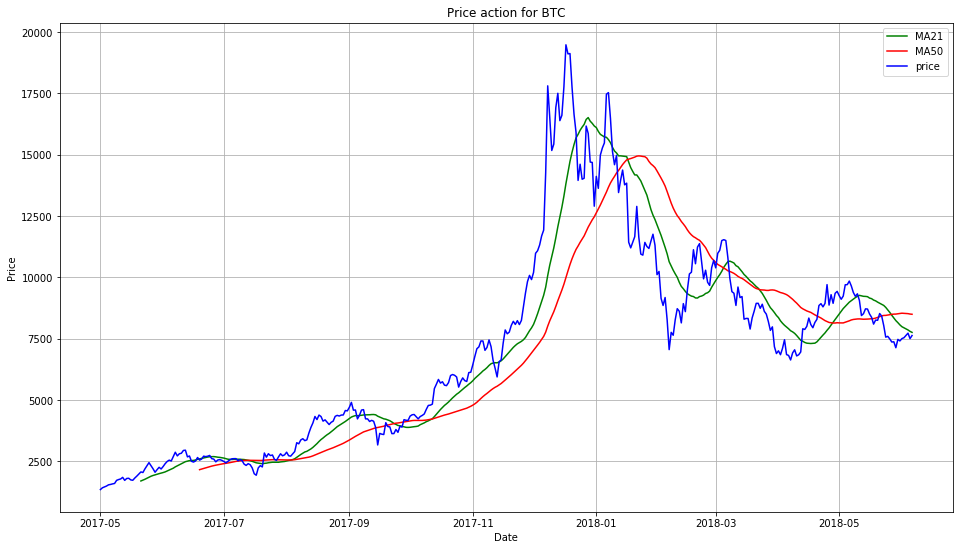

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()


plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [151]:
def plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date):
    coins.index = pd.to_datetime(coins.index)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    #Если ведущее среднее больше запаздывающего на threshold то обновляем multiplier
    lagging_mean = coins[coins['symbol'] == symbol]['price'].rolling(window=lag_window).mean()
    leading_mean = coins[coins['symbol'] == symbol]['price'].rolling(window=lead_window).mean()
    multiplier = 1
    multiplier_list = []
    for i in range(len(coins[coins['symbol'] == symbol][start_date:end_date])):
        if leading_mean[i] > lagging_mean[i] + threshold:
            multiplier = multiplier * coins[coins['symbol'] == symbol][start_date:end_date]['price'][i] / coins[coins['symbol'] == symbol][start_date:end_date]['price'][i-1]
        multiplier_list.append(multiplier)

    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))

    #make x as dates from start_date to end_date
    x = coins[coins['symbol'] == symbol][start_date:end_date].index
    ax.plot(x, multiplier_list, color='green', label='Multiplier')
    ax.set_xlabel('Date')
    ax.set_ylabel('Multiplier')
    ax.legend(loc='best')
    ax.grid(True)

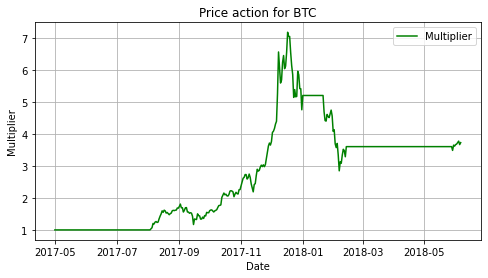

In [152]:
plot_moving_averages_strategy(
    coins=coins,
    symbol='BTC',
    lead_window=21,
    lag_window=50,
    threshold=0.01,
    start_date='2017-05-01',
    end_date='2018-08-01')

In [160]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
import ipywidgets
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.